## This is the test for the NN with 

In [1]:
import numpy as np
import numpy.random
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd # Pandas library
import numpy as np # Numpy library
import matplotlib.pyplot as plt # Matplotlib library
import numpy.linalg as la # Linear algebra functions
import math # Math library
import random # Random library
import seaborn as sns # Seaborn library

crime_data = pd.read_csv('./SanFranciscoCrimeDataset/crime.csv',
                          header=1,
                          skipinitialspace=False,
                          names=['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
                                'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
crime_data = crime_data[ ~crime_data['PdDistrict'].isna() ]

In [2]:
crime_data = pd.read_csv('./SanFranciscoCrimeDataset/crime.csv',
                          header=1,
                          skipinitialspace=False,
                          names=['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
                                'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
crime_data = crime_data[ ~crime_data['PdDistrict'].isna() ]

#Time
crime_data_timeMin = [((int(i.split(':')[0])*60) + int(i.split(':')[1])) for i in crime_data['Time']]
crime_data['Time in Min'] = crime_data_timeMin
print("Done Time")

#Date
crime_data_date = [i.split()[0] for i in crime_data['Date']]
crime_data_dateDays = [ ((int(i.split('/')[0])-1)*30.4167) + (int(i.split('/')[1])) for i in crime_data_date]
crime_data['Date in Days'] = crime_data_dateDays
print("Done Date")

#PD District
District_Parse = list(set([i[0] for i in crime_data[['PdDistrict']].values]))
crime_data_District = [np.array([0 if District_Parse.index(d)!=i else\
 1 for (i,p) in enumerate(District_Parse)]) for d in\
crime_data[['PdDistrict']].values]

crime_data['One Hot Encoding PdDist'] = crime_data_District
print("Done PD District")

#Day of week
Day_Parse = list(set([i[0] for i in crime_data[['DayOfWeek']].values]))
crime_data_Day = [np.array([0 if Day_Parse.index(d)!=i else 1 for\
(i,p) in enumerate(Day_Parse)]) for d in crime_data[['DayOfWeek']]\
.values]

crime_data['One Hot Encoding DayOfWeek'] = crime_data_Day

print("Done Day of Week")

#Category
Category_Parse = list(set([i[0] for i in crime_data[['Category']].values]))
crime_data_Category = [np.array([0 if Category_Parse.index(d)!=i\
else 1 for (i,p) in enumerate(Category_Parse)]) for d in\
crime_data[['Category']].values]

crime_data['One Hot Encoding Category'] = crime_data_Category

print("Done")

Done Time
Done Date
Done PD District
Done Day of Week
Done


In [3]:
crime_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Time in Min,Date in Days,One Hot Encoding PdDist,One Hot Encoding DayOfWeek,One Hot Encoding Category
0,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168,660,29.0000,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010,899,116.2501,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000,1430,5.0000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000,30,1.0000,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134,1295,1.0000,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."


In [4]:
def split_sets(dataframe, train_p):
    """
    Returns 2 lists of the form needed to use the KNN class using the San Francisco Crime dataset
    -- The function uses x and y coordinate data for graphing and the type of crime as our labels.
    **The dataframe passed can be subset to go by location to see how KNN works on each "area"
    """
    assert(train_p < 1) # Make sure that p is a percentage
    assert(train_p > 0) # Make sure that p is non-negative
    
    # Split dataframe into training and test/prediction sets
    train_count = int(dataframe.shape[0] * train_p)
    predict_count = int(dataframe.shape[0] * (1 - train_p))
    train_count_Y = int(dataframe.shape[0] * train_p)
    predict_count_Y = int(dataframe.shape[0] * (1 - train_p))
    
    
    tmp_list = dataframe.values[:]
    np.random.shuffle(tmp_list) # Shuffle the rows
    train_list = tmp_list[0:train_count] # Take the first train_p percentage for the training data
    predict_list = tmp_list[train_count:] # The rest go to predict data
    

    rtn_train = [[i[9], i[10], i[13], i[14], *i[15], *i[16]] for i in train_list]
    rtn_predict = [[i[9], i[10], i[13], i[14], *i[15], *i[16]]for i in predict_list]
    
    rtn_train_Y = [i[17] for i in train_list]
    rtn_predict_Y = [ i[17] for i in predict_list]
    
    return rtn_train, rtn_predict, rtn_train_Y, rtn_predict_Y


train_NN1, predict_NN1, train_NN1_Y, predict_NN1_Y = split_sets(crime_data, .3)

train_NN = np.array(train_NN1)
train_NN_Y = np.array(train_NN1_Y)

print(train_NN)
print(train_NN_Y)

[[ -1.22403405e+02   3.77754207e+01   1.05000000e+03 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -1.22407686e+02   3.77670824e+01   4.60000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.22439684e+02   3.77761964e+01   1.38000000e+03 ...,   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [ -1.22474200e+02   3.77533881e+01   9.72000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.22406521e+02   3.77850629e+01   9.80000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.22455280e+02   3.77814574e+01   1.14000000e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [5]:
from nn import NN
import nn
import importlib # needed to reload a module
importlib.reload(nn) # reload to get the new defs
from nn import NN

In [6]:
parse_crimes = list(set([i[0] for i in crime_data[['Category']].values]))

test = NN(21, 1,2,  .1, True, len(parse_crimes))
test.reset()

loses = []

loses.append(test.train_rounds(train_NN[:1000], train_NN_Y[:1000], 1))


for i in range(1,3):
    loses.append(test.train_rounds(train_NN[:1000], train_NN_Y[:1000], 100))

print("Done")

/home/jovyan/COSC311/Project2RosiakDawson/nn.py:87: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*arr))


Current loss: 2606.77523785
Current loss: 1111.35355462
Current loss: 1109.98924978
Done


In [7]:
# train_northern1, predict_northern1 = split_sets(northern_district, .3)
# northern_test1 = KNN(11)
sub_cf_northern = []
for i in range(0,len(predict_NN1[:100])):
    #print(str(parse_crimes[predict_NN1_Y[i].argmax()]))
    sub_cf_northern.append((test.predict(predict_NN1[i], predict_NN1_Y[i], parse_crimes), str(parse_crimes[predict_NN1_Y[i].argmax()])))
    
accum_category_nums = {correct_crime: {guessed_crime: 0 for guessed_crime in parse_crimes} for correct_crime in parse_crimes}

for prediction in sub_cf_northern:
    accum_category_nums[prediction[1]][prediction[0]] += 1
confusion_matrix = [[value for value in dicts.values()] for dicts in accum_category_nums.values()]


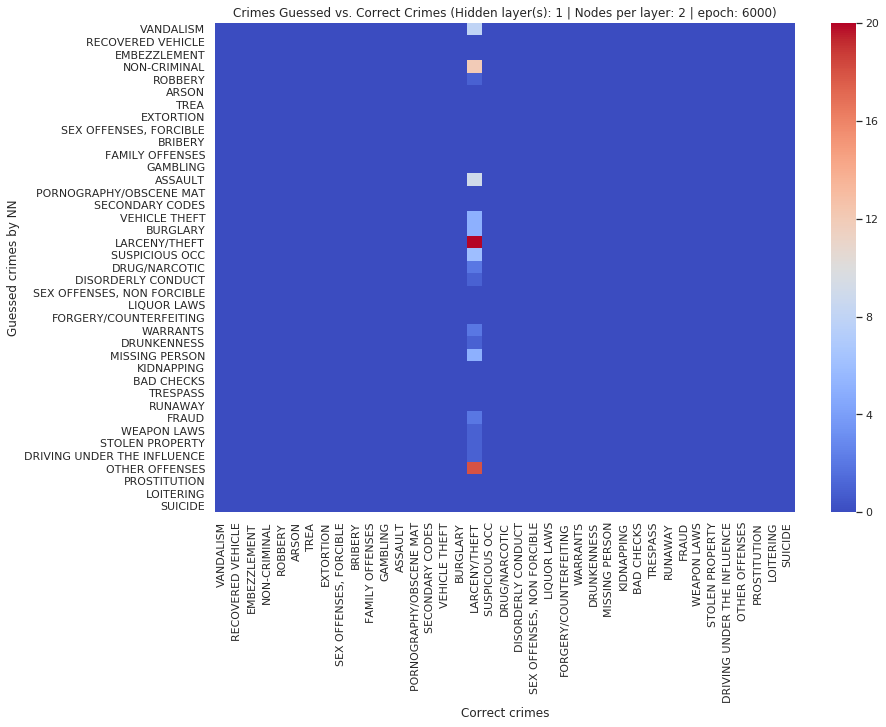

In [8]:
# Plot the heatmap using seaborn
sns.set(rc={'figure.figsize':(13,9)})
ax = sns.heatmap(data=np.array(confusion_matrix), cmap='coolwarm', cbar=True, xticklabels=parse_crimes, yticklabels=parse_crimes)
ax.set(title='Crimes Guessed vs. Correct Crimes (Hidden layer(s): 1 | Nodes per layer: 2 | epoch: 6000)',
      xlabel='Correct crimes',
      ylabel='Guessed crimes by NN')
plt.show()
print()

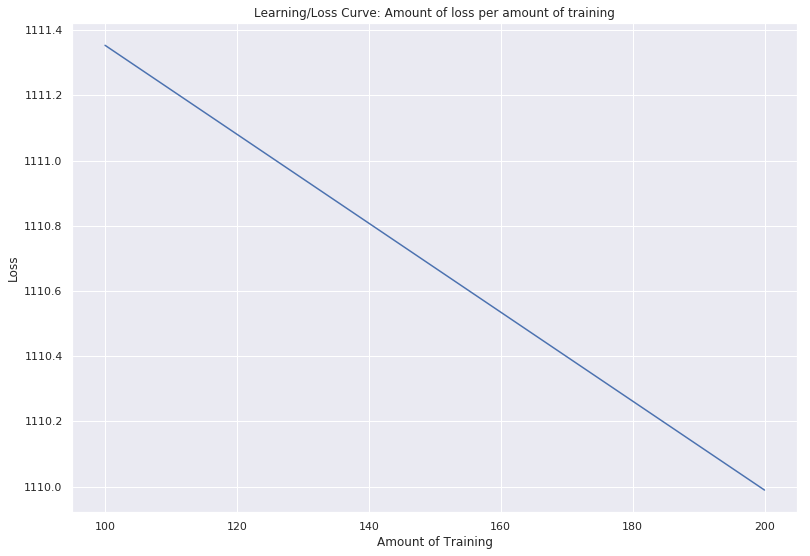

In [11]:
# Printing the learning curve for northern
plt.plot([i*100 for i in range(1, 3)], loses[1:3])
plt.title('Learning/Loss Curve: Amount of loss per amount of training')
plt.xlabel('Amount of Training')
plt.ylabel('Loss')
plt.show()